In [32]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [6]:
PATH_TO_DATA = 'processed_data/'
N_FILES = 10

In [9]:
df_list = []
for i in range(N_FILES):
    df_list.append(pd.read_csv(PATH_TO_DATA + f'processed_{i}.csv'))

In [14]:
df_list[0]

,x,y,z
0,6.211380,0.073639,5.979745
1,6.211414,0.073630,5.981267
2,6.211435,0.073635,5.986720
3,6.211446,0.073633,5.996077
4,6.211451,0.073634,6.009118
...,...,...,...
95,6.382674,0.070026,11.170901
96,6.382548,0.070018,11.170737
97,6.382456,0.070016,11.170617
98,6.382331,0.070019,11.170458


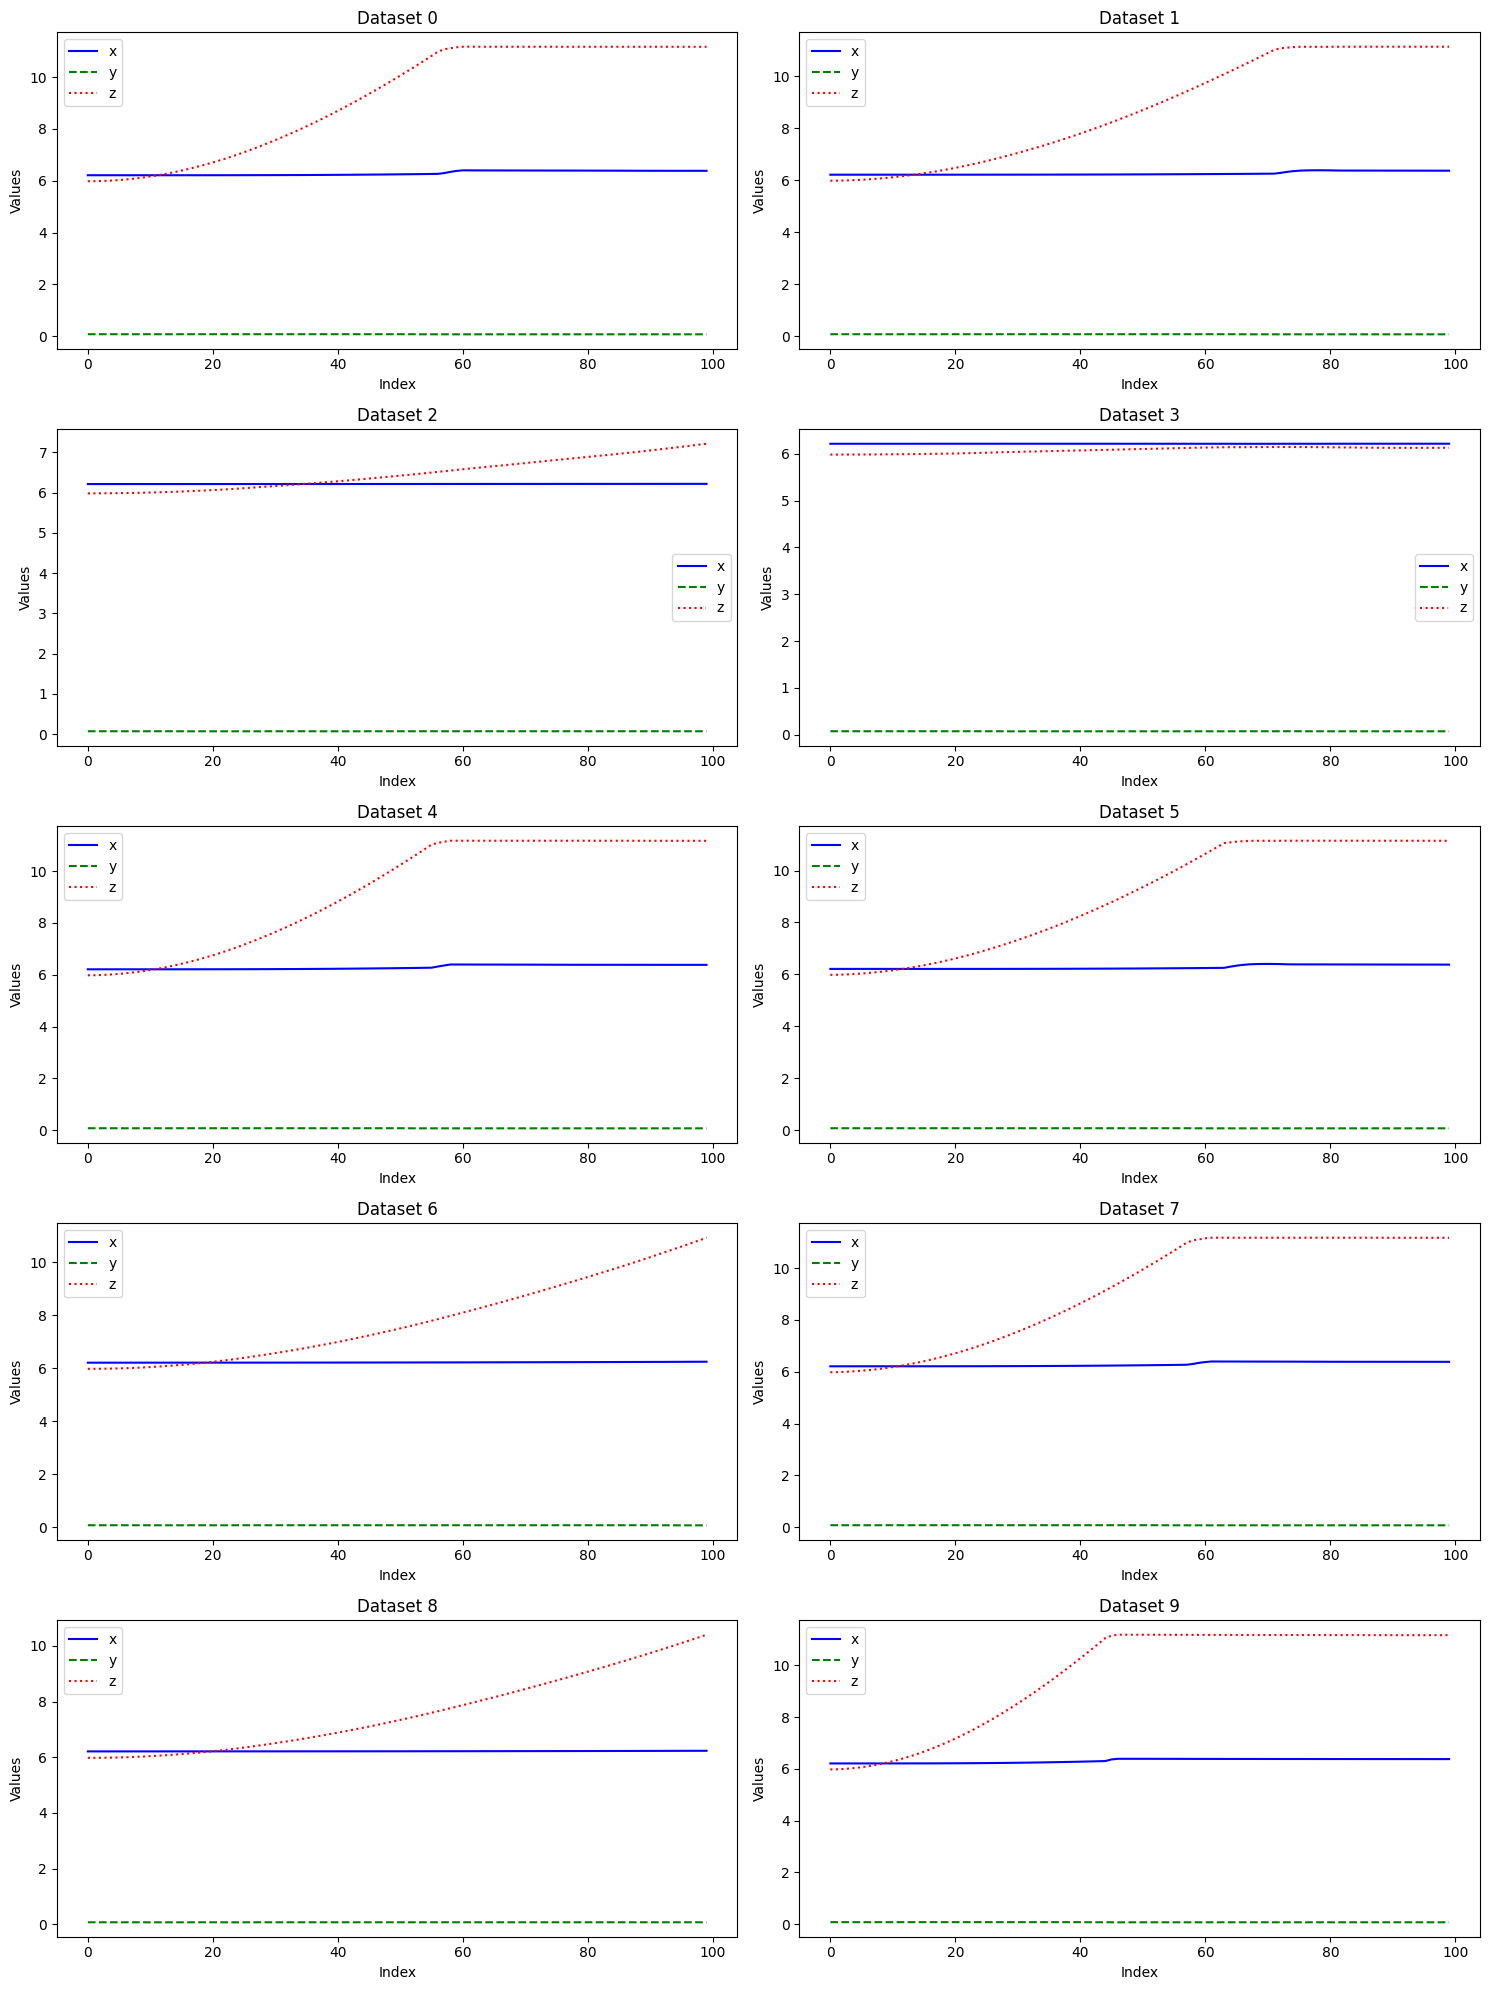

In [16]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))  # Adjust the layout if necessary
axes = axes.flatten()

colors = ['b', 'g', 'r']

for i, df in enumerate(df_list):
    axes[i].plot(df.index, df['x'], label='x', color=colors[0])
    axes[i].plot(df.index, df['y'], label='y', linestyle='--', color=colors[1])
    axes[i].plot(df.index, df['z'], label='z', linestyle=':', color=colors[2])
    axes[i].set_title(f'Dataset {i}')
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel('Values')
    axes[i].legend()

plt.tight_layout()
plt.show()

In [24]:
y = [1, 1, 0, 1, 1, 1, 0, 1, 0, 1]
X = [df.values.flatten() for df in df_list]
X = np.array(X)

In [25]:
DATA_LENGTH = len(X)
SPLIT_PERCENTAGE = 0.8

split_index = int(DATA_LENGTH * SPLIT_PERCENTAGE)

In [26]:
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [33]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Predicted labels:', y_pred)
print('Actual labels:', y_test)

Accuracy: 1.00
Predicted labels: [0 1]
Actual labels: [0, 1]
